## Big Data Analysis with Python

In [2]:
import pyspark
import os

# Creating spark context & sqlcontext
sc = pyspark.SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [3]:
from pyspark.sql import *
na_schema = Row("Name","Subject","Marks")
row1 = na_schema("Ankit", "Science",95)
row2 = na_schema("Ankit", "Maths", 86)
row3 = na_schema("Preity", "Maths", 92)
na_list = [row1, row2, row3]
df_na = sqlc.createDataFrame(na_list)
type(df_na)

pyspark.sql.dataframe.DataFrame

In [4]:
df_na.show()

+------+-------+-----+
|  Name|Subject|Marks|
+------+-------+-----+
| Ankit|Science|   95|
| Ankit|  Maths|   86|
|Preity|  Maths|   92|
+------+-------+-----+



In [4]:
data = [("Ankit",23),("Tyler",26),("Preity",36)]
data_rdd = sc.parallelize(data)
type(data_rdd)

pyspark.rdd.RDD

In [6]:
data_sd = sqlc.createDataFrame(data_rdd)
data_sd.show()

+------+---+
|    _1| _2|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



In [5]:
df = sqlc.read.format('com.databricks.spark.csv').options(header='true',inferschema='true').load('iris.csv')
print(type(df))
df.show(4)

<class 'pyspark.sql.dataframe.DataFrame'>
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 4 rows



In [6]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [7]:
#print the column names of the Spark DataFrame
df.schema.names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
#Counting the number of rows in DataFrame
df.count()

150

In [9]:
#Counting the number of columns in DataFrame
len(df.columns)

5

In [10]:
#compute the summary statistics, such as mean and standard deviation, for all the numerical columns in the DataFrame:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [11]:
#compute the summary statistics for an individual numerical column of a Spark DataFrame
df.describe('sepal_width').show()

+-------+-------------------+
|summary|        sepal_width|
+-------+-------------------+
|  count|                150|
|   mean| 3.0540000000000007|
| stddev|0.43359431136217375|
|    min|                2.0|
|    max|                4.4|
+-------+-------------------+



In [12]:
#Rename the columns of a Spark DataFrame using the withColumnRenamed() method:
df = df.withColumnRenamed('sepal_width','Sepalwidth')
df = df.withColumnRenamed('sepal_length','Sepallength')

In [13]:
df.columns

['Sepallength', 'Sepalwidth', 'petal_length', 'petal_width', 'species']

In [14]:
df.show(3)

+-----------+----------+------------+-----------+-------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|
+-----------+----------+------------+-----------+-------+
|        5.1|       3.5|         1.4|        0.2| setosa|
|        4.9|       3.0|         1.4|        0.2| setosa|
|        4.7|       3.2|         1.3|        0.2| setosa|
+-----------+----------+------------+-----------+-------+
only showing top 3 rows



In [15]:
#Select a single column or multiple columns from a Spark DataFrame using the select method:
df.select('Sepalwidth','Sepallength').show(4)

+----------+-----------+
|Sepalwidth|Sepallength|
+----------+-----------+
|       3.5|        5.1|
|       3.0|        4.9|
|       3.2|        4.7|
|       3.1|        4.6|
+----------+-----------+
only showing top 4 rows



In [16]:
#Add a new column in a Spark DataFrame using the withColumn method:
df = df.withColumn('Half_sepal_width', df['Sepalwidth']/2.0)
df.show(4)

+-----------+----------+------------+-----------+-------+----------------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|Half_sepal_width|
+-----------+----------+------------+-----------+-------+----------------+
|        5.1|       3.5|         1.4|        0.2| setosa|            1.75|
|        4.9|       3.0|         1.4|        0.2| setosa|             1.5|
|        4.7|       3.2|         1.3|        0.2| setosa|             1.6|
|        4.6|       3.1|         1.5|        0.2| setosa|            1.55|
+-----------+----------+------------+-----------+-------+----------------+
only showing top 4 rows



In [17]:
#remove a column in a Spark DataFrame, use the drop method 
df = df.drop('Half_sepal_width')
df.show(4)

+-----------+----------+------------+-----------+-------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|
+-----------+----------+------------+-----------+-------+
|        5.1|       3.5|         1.4|        0.2| setosa|
|        4.9|       3.0|         1.4|        0.2| setosa|
|        4.7|       3.2|         1.3|        0.2| setosa|
|        4.6|       3.1|         1.5|        0.2| setosa|
+-----------+----------+------------+-----------+-------+
only showing top 4 rows



In [18]:
#Select the distinct values in any column of a Spark DataFrame using the distinct method, in conjunction with the select method:
df.select('Species').distinct().show()

+----------+
|   Species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [19]:
#count the distinct values in any column of a Spark DataFrame, use the count method, in conjunction with the distinct method:
df.select('Species').distinct().count()

3

In [33]:
#Remove the duplicate values from a DataFrame using the dropDuplicates() method:
df.select('Species').dropDuplicates().show()

+----------+
|   Species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [35]:
# Filtering using a single condition
df.filter(df.species == 'setosa').show(4)

+-----------+----------+------------+-----------+-------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|
+-----------+----------+------------+-----------+-------+
|        5.1|       3.5|         1.4|        0.2| setosa|
|        4.9|       3.0|         1.4|        0.2| setosa|
|        4.7|       3.2|         1.3|        0.2| setosa|
|        4.6|       3.1|         1.5|        0.2| setosa|
+-----------+----------+------------+-----------+-------+
only showing top 4 rows



In [37]:
# filter the column using multiple conditions, use the following command:
df.filter((df.Sepallength > 5) & (df.species == 'setosa')).show(4)

+-----------+----------+------------+-----------+-------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|
+-----------+----------+------------+-----------+-------+
|        5.1|       3.5|         1.4|        0.2| setosa|
|        5.4|       3.9|         1.7|        0.4| setosa|
|        5.4|       3.7|         1.5|        0.2| setosa|
|        5.8|       4.0|         1.2|        0.2| setosa|
+-----------+----------+------------+-----------+-------+
only showing top 4 rows



In [38]:
#Sort the rows in a DataFrame, using one or multiple conditions, in ascending or descending order:
df.orderBy(df.Sepallength).show(5)

+-----------+----------+------------+-----------+-------+
|Sepallength|Sepalwidth|petal_length|petal_width|species|
+-----------+----------+------------+-----------+-------+
|        4.3|       3.0|         1.1|        0.1| setosa|
|        4.4|       3.2|         1.3|        0.2| setosa|
|        4.4|       3.0|         1.3|        0.2| setosa|
|        4.4|       2.9|         1.4|        0.2| setosa|
|        4.5|       2.3|         1.3|        0.3| setosa|
+-----------+----------+------------+-----------+-------+
only showing top 5 rows



In [39]:
#To sort the rows in descending order, use the following command:
df.orderBy(df.Sepallength.desc()).show(5)

+-----------+----------+------------+-----------+---------+
|Sepallength|Sepalwidth|petal_length|petal_width|  species|
+-----------+----------+------------+-----------+---------+
|        7.9|       3.8|         6.4|        2.0|virginica|
|        7.7|       2.6|         6.9|        2.3|virginica|
|        7.7|       3.8|         6.7|        2.2|virginica|
|        7.7|       3.0|         6.1|        2.3|virginica|
|        7.7|       2.8|         6.7|        2.0|virginica|
+-----------+----------+------------+-----------+---------+
only showing top 5 rows



In [40]:
#To calculate the mean sepal width for each species, use the following command:
df.groupby('Species').agg({'Sepalwidth' : 'mean'}).show()

+----------+------------------+
|   Species|   avg(Sepalwidth)|
+----------+------------------+
| virginica|2.9739999999999998|
|versicolor|2.7700000000000005|
|    setosa|3.4180000000000006|
+----------+------------------+



In [41]:
#let's calculate the number of rows for each species by using the following command:
df.groupby('Species').count().show()

+----------+-----+
|   Species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



In [42]:
data = df.groupby('Species').count().toPandas()
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Species,count
0,virginica,50
1,versicolor,50
2,setosa,50


Text(0.5, 1.0, 'Number of rows per species')

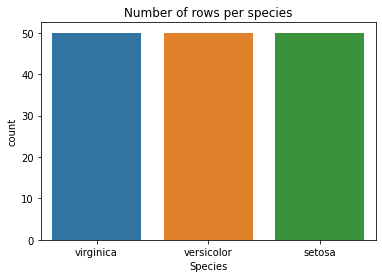

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot( x = data['Species'], y = data['count'])
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Number of rows per species')

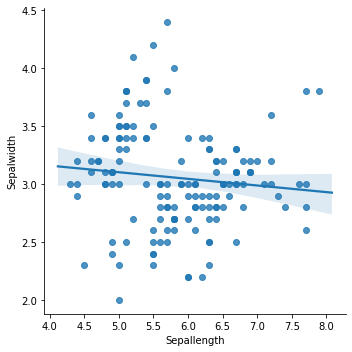

In [46]:
data = df.toPandas()
sns.lmplot(x = "Sepallength", y = "Sepalwidth", data = data);

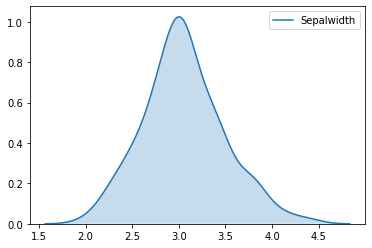

In [47]:
import seaborn as sns
data = df.toPandas()
sns.kdeplot(data.Sepalwidth, shade = True)
plt.show()

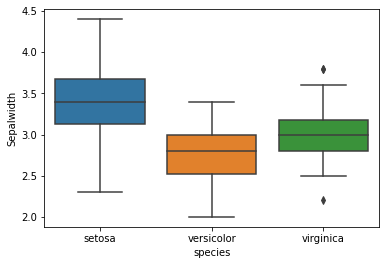

In [49]:
sns.boxplot(x = "species", y = "Sepalwidth", data = data)
plt.show()

### CH 5

In [1]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [5]:
df = sqlc.read.csv('iris.csv',header=True, inferSchema=True)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [8]:
#how to count the missing values from the PySpark DataFrame column:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+



In [10]:
# We will count the missing values in the Sepallength column of the Iris dataset loaded in the PySpark DataFrame df object:

df.filter(col('sepal_length').isNull()).count()

0

In [11]:
# Counting Missing Values in All DataFrame Columns
df.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in
df.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+



A simple way is to just use the describe() function, which gives the count of
non-missing values for each column, along with a bunch of other summary
statistics. 

In [12]:
df.describe().show(1)

+-------+------------+-----------+------------+-----------+-------+
|summary|sepal_length|sepal_width|petal_length|petal_width|species|
+-------+------------+-----------+------------+-----------+-------+
|  count|         150|        150|         150|        150|    150|
+-------+------------+-----------+------------+-----------+-------+
only showing top 1 row



In [13]:
#Fetching Missing Value Records from the DataFrame
df.where(col('sepal_length').isNull()).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
+------------+-----------+------------+-----------+-------+



**Handling Missing Values in Spark DataFrames**

In [15]:
df.select('sepal_length').dropna().count()

150

In [16]:
#To remove all the records containing any missing value entry for any column from the PySpark DataFrame,
df.dropna().count()

150

In [18]:
#Filling Missing Values with a Constant in a DataFrame Column
y = df.select('sepal_length','petal_length').fillna(1)

y.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in
y.columns]).show()

+------------+------------+
|sepal_length|petal_length|
+------------+------------+
|           0|           0|
+------------+------------+



In [19]:
#steps to calculate the correlation between two variables:
df.corr('sepal_length', 'sepal_width')

-0.10936924995064931

In [20]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [21]:
z = df.fillna(1)
a = z.drop('Species')
features = a.rdd.map(lambda row: row[0:])
correlation_matrix = Statistics.corr(features, method="pearson")

In [22]:
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.index, correlation_df.columns = a.columns, a.columns
correlation_df

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## CH 6 Exploratory Data Analysis

In [1]:
import pandas as pd
pd.__version__

'1.0.3'

In [3]:
import os
import pandas as pd
import numpy as np
import collections
from sklearn.base import TransformerMixin
import random
#import pandas_profiling

import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

In [7]:
spark_df = spark.read.csv('bank.csv', sep=';', header = True, inferSchema =True)
spark_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [8]:
spark_df.head(5)

[Row(age=30, job='unemployed', marital='married', education='primary', default='no', balance=1787, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=33, job='services', marital='married', education='secondary', default='no', balance=4789, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220, campaign=1, pdays=339, previous=4, poutcome='failure', y='no'),
 Row(age=35, job='management', marital='single', education='tertiary', default='no', balance=1350, housing='yes', loan='no', contact='cellular', day=16, month='apr', duration=185, campaign=1, pdays=330, previous=1, poutcome='failure', y='no'),
 Row(age=30, job='management', marital='married', education='tertiary', default='no', balance=1476, housing='yes', loan='yes', contact='unknown', day=3, month='jun', duration=199, campaign=4, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=59, job='blue-coll

In [9]:
spark_df.count()

4521

In [10]:
len(spark_df.columns), spark_df.columns

(17,
 ['age',
  'job',
  'marital',
  'education',
  'default',
  'balance',
  'housing',
  'loan',
  'contact',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'y'])

In [11]:
spark_df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|summary|               age|    job| marital|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|   y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|  count|              4521|   4521|    4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|4521|
|   mean| 41.17009511170095|   null|    null|     null|   null|1422.6578190665782|   null|null|    null|15.9152842291528

In [12]:
spark_df.select('balance','y').show(5)

+-------+---+
|balance|  y|
+-------+---+
|   1787| no|
|   4789| no|
|   1350| no|
|   1476| no|
|      0| no|
+-------+---+
only showing top 5 rows



In [13]:
spark_df.crosstab('y', 'marital').show()

+---------+--------+-------+------+
|y_marital|divorced|married|single|
+---------+--------+-------+------+
|      yes|      77|    277|   167|
|       no|     451|   2520|  1029|
+---------+--------+-------+------+

